In [ ]:
# Try other algorithms

# Coop Case Study - Viral Trending product detection

## Anomaly detection approach

## Preprocessing

In [1]:
# Libraries 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error as mse 
from sklearn.neural_network import MLPRegressor

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (22, 14),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)

#### Import functions from ./Functions_Forecasting AR file in this same folder, look for comments on the functions in that notebook



In [2]:
from ipynb.fs.defs.Functions_Forecasting import * 


### importing data

In [3]:
data = pd.read_csv("./4months_v2/rl_4months.csv")

In [4]:
data.shape

(3221229, 40)

In [5]:
#data[["receiptKey","DayDate","hourOfDay","minuteOfHour","quantity","ItemID"]].iloc[0:20,]

In [6]:
# Generate unique name 
data['Unique_Item_Name'] = data['ItemCategoryName'] + '_' + data['ItemSegmentName']

In [7]:
data_subset = data[['DayDate','hourOfDay', 'ItemID', 'quantity']]



### Deletion of returns and false duplicates of Negative and 0 Quantities

In [8]:
data_subset = data_subset[data_subset.quantity>0]

In [9]:
data_subset['timestamp'] = data_subset['DayDate'].astype(str) + ' '+  data_subset['hourOfDay'].astype(str)


#### Generation of Support Timestamp Vectors

In [10]:
# Days Vector
timestamp_agg_days = data_subset['DayDate'].unique()
timestamp_agg_days.sort()


In [11]:
# Day Hour Vector
timestamp_agg_hours = [None] * len(timestamp_agg_days)*16

count = 0
for i in range(len(timestamp_agg_days)):
    
    for j in range(16):
        
        timestamp_agg_hours[count] = timestamp_agg_days[i] + ' ' + str(7 + j)
        count+=1


### Aggregating Datasets

In [12]:
# Aggregation of items with HOURLY criterion and counting ocurrences

df_agg_hours = data_subset.groupby(['timestamp', 'ItemID']).sum()
df_agg_hours.reset_index(inplace=True)
df_agg_hours.drop(columns=['hourOfDay'], inplace=True)

# Aggregation of items with DAYLY criterion and counting ocurrences

df_agg_days = data_subset.groupby(['DayDate', 'ItemID']).sum()
df_agg_days.reset_index(inplace=True)
df_agg_days.drop(columns='hourOfDay', inplace=True)

In [13]:
ItemID = 7
name_item = data[data["ItemID"]==ItemID]['Unique_Item_Name'].iloc[0]
name_item

'LÖSVIKTSGODIS_STANDARD'

In [14]:
hourly_purchase_7 = get_hourly_purchases(df_agg_hours,timestamp_agg_hours, ItemID)

In [15]:
daily_purchase_7 = get_daily_purchases(df_agg_days, timestamp_agg_days, ItemID)

In [16]:
daily_purchase_7.std() 

quantity    19.310838
dtype: float64

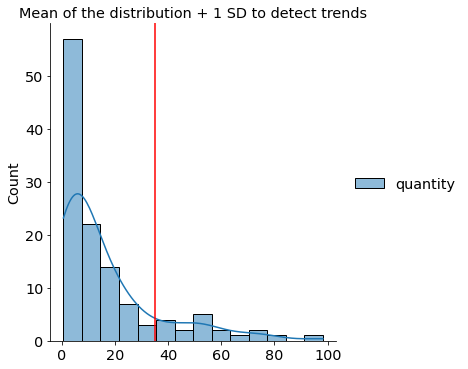

In [17]:
std_1mean = int((daily_purchase_7.mean() + daily_purchase_7.std()))
sns.displot(daily_purchase_7, kde=True).set(title='Mean of the distribution + 1 SD to detect trends')

plt.axvline(std_1mean, 0, c='r')


## One-class support vector machine

Classify any points that lie outside the boundary as outliers

## Let's loop and retrieve all the anomalies!

Advisable to downsample dataset to most sold Items (great computational burden) 

In [22]:
unique_itemIDs = data_subset.ItemID.unique()

aggr_df = [None]*len(unique_itemIDs)
dictionary_agg_ID = dict(zip(unique_itemIDs, aggr_df))


In [23]:
df_agg_days

,DayDate,ItemID,quantity
0,2020-02-01,5,1.296
1,2020-02-01,7,56.910
2,2020-02-01,8,2.808
3,2020-02-01,22,1.000
4,2020-02-01,33,1.522
...,...,...,...
697397,2020-05-31,793899,2.000
697398,2020-05-31,794116,1.000
697399,2020-05-31,802115,1.000
697400,2020-05-31,804121,1.000


In [24]:
for i in unique_itemIDs:
    
    dictionary_agg_ID[i] = get_daily_purchases(df_agg_days, timestamp_agg_days, i)

In [25]:
unique_itemIDs[-1]

196375

In [37]:
outlier_series_IDs = [find_outliers(dictionary_agg_ID[i].quantity, perc=0.20) for i in unique_itemIDs]

In [58]:
ItemID = unique_itemIDs[0]
name_item = data[data["ItemID"]==ItemID]['Unique_Item_Name'].iloc[0]
name_item

'GRÖNSAKER_SKUREN SALLAD'

In [59]:
outlier_series_IDs[0]

,ts,index,outlier
DayDate,,,
2020-02-01,6.0,0,0
2020-02-02,9.0,1,0
2020-02-03,5.0,2,0
2020-02-04,7.0,3,0
2020-02-05,6.0,4,0
...,...,...,...
2020-05-27,0.0,116,1
2020-05-28,13.0,117,0
2020-05-29,16.0,118,1


In [52]:
ItemID = unique_itemIDs[0]
name_item = data[data["ItemID"]==ItemID]['Unique_Item_Name'].iloc[0]
name_item

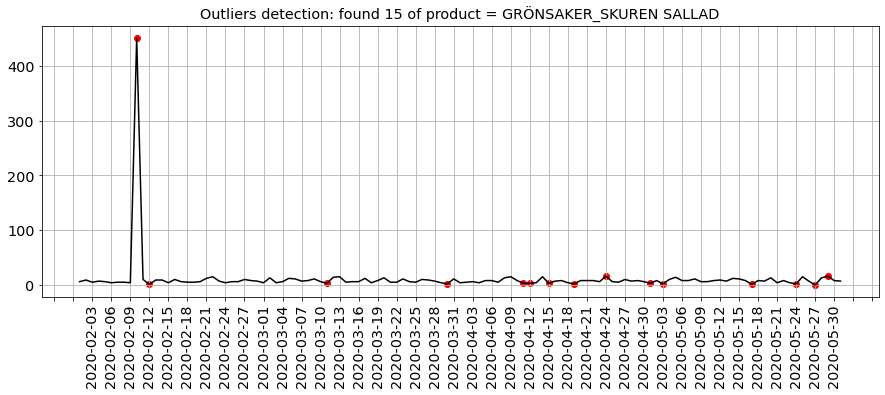

In [60]:
find_outliers_plot(outlier_series_IDs[0], name_item, filter_threshold=None)

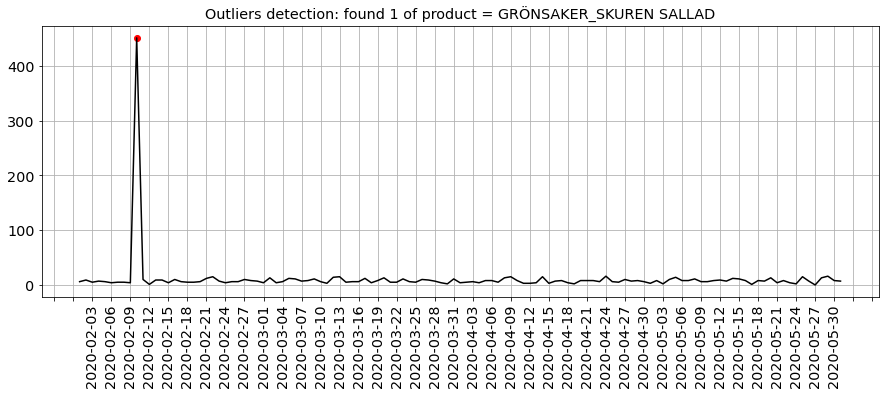

In [62]:
find_outliers_plot(outlier_series_IDs[0],name_item,  filter_threshold=1)

In [63]:
ItemID = unique_itemIDs[2]
name_item = data[data["ItemID"]==ItemID]['Unique_Item_Name'].iloc[0]
name_item

'MEJERI_FILMJÖLK'

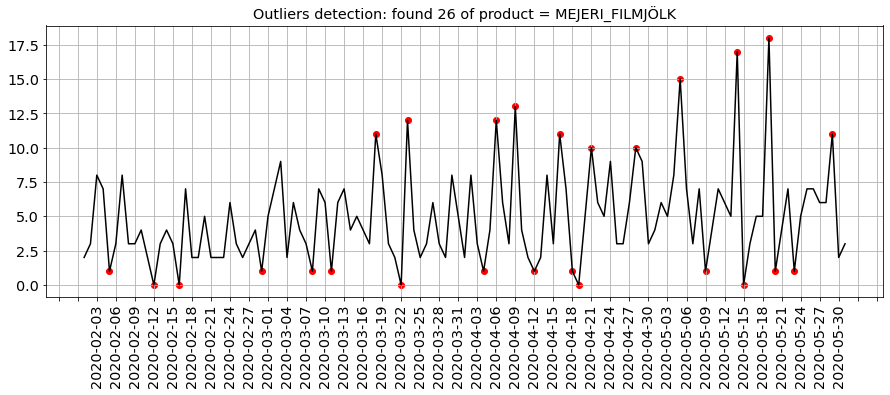

In [64]:
find_outliers_plot(outlier_series_IDs[2], name_item, filter_threshold=None)

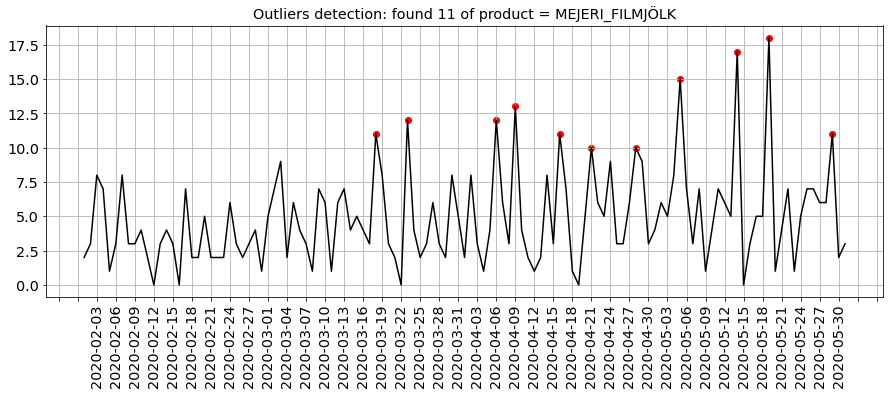

In [65]:
find_outliers_plot(outlier_series_IDs[2], name_item, filter_threshold=1)